In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# ImageDataGenerator 객체 생성 (rescale로 정규화)
Train_Datagen =  ImageDataGenerator(rescale=1/255)
Test_Datagen =  ImageDataGenerator(rescale=1/255)

In [3]:
# train과 test 폴더가 나눠져있지 않아서 같은 디렉토리 사용
train_dir = './data/'
test_dir = './data/'

In [4]:
# ImageDataGenerator  설정
train_generator = Train_Datagen.flow_from_directory(
    train_dir,   # 학습용 이미지를 가져올 폴더
    classes=['paper', 'rock', 'scissors'],  # label : paper:0, rock:1, scissors:2
    target_size=(120, 120),    #이미지 resize
    batch_size=12,             #한번에 12개의 이미지만 가져와서 학습
    class_mode='categorical'        #세가지로 분류하므로 categorical
)

test_generator = Test_Datagen.flow_from_directory(
    test_dir,   # 학습용 이미지를 가져올 폴더
    classes=['paper', 'rock', 'scissors'],  # label : paper:0, rock:1, scissors:2
    target_size=(120, 120),    #이미지 resize
    batch_size=12,             #한번에 12개의 이미지만 가져와서 학습
    class_mode='categorical'        #세가지로 분류하므로 categorical
)

Found 2892 images belonging to 3 classes.
Found 2892 images belonging to 3 classes.


In [5]:
# CNN Model 구현

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(120,120,3)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

In [6]:
# FC layer(DNN)의 input layer
model.add(Flatten())    # 전체 데이터를 4차원에서 2차원으로 변경

# hidden layer
model.add(Dense(units=64,
                activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=3,
                activation='softmax'))

In [7]:
# print(model.summary())
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# 너무 많은 Epoch 은 overfitting, 너무 적은 Epoch 은 underfitting 을 일으킴 
# Epoch 을 많이 돌린 후, 특정 시점에서 멈추게 하는 것 : early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# patience : 성능이 증가하지 않는 에폭을 몇번이나 허용할 것인가
#verbose=1 : 언제 keras 에서 training 을 멈추었는지를 화면에 출력

In [9]:
# 설정이 다 되었으면 모델을 학습.
history = model.fit(train_generator,
          steps_per_epoch=241,
          epochs=20,
          verbose=1,
          validation_data=test_generator,
          validation_steps=12,
          callbacks=[early_stopping])

Epoch 1/20
241/241 [==============================] - 16s 46ms/step - loss: 3.6233 - accuracy: 0.3358 - val_loss: 1.0994 - val_accuracy: 0.3403
Epoch 2/20
241/241 [==============================] - 11s 45ms/step - loss: 1.0995 - accuracy: 0.3281 - val_loss: 1.1101 - val_accuracy: 0.2431
Epoch 3/20
241/241 [==============================] - 11s 45ms/step - loss: 1.1003 - accuracy: 0.3157 - val_loss: 1.1019 - val_accuracy: 0.2639
Epoch 4/20
241/241 [==============================] - 11s 45ms/step - loss: 1.1001 - accuracy: 0.3292 - val_loss: 1.1000 - val_accuracy: 0.3056
Epoch 5/20
241/241 [==============================] - 11s 45ms/step - loss: 1.1003 - accuracy: 0.3313 - val_loss: 1.0995 - val_accuracy: 0.3125
Epoch 6/20
241/241 [==============================] - 11s 45ms/step - loss: 1.0999 - accuracy: 0.3243 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 7/20
241/241 [==============================] - 11s 45ms/step - loss: 1.0997 - accuracy: 0.3264 - val_loss: 1.1003 - val_accuracy:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 116, 116, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                12845120  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [12]:
import matplotlib.pyplot as plt

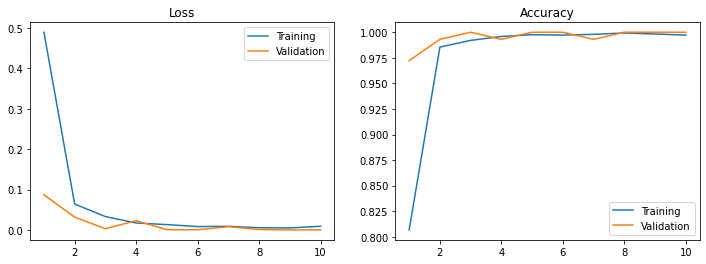

In [13]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 20)